In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats



In [2]:


def convert(data):
    number = preprocessing.LabelEncoder()
    data['operator'] = number.fit_transform(data.operator)
    data['methodReturn'] = number.fit_transform(data.methodReturn)
    data['isKilled'] = number.fit_transform(data.isKilled)
    return data

# Read in data and display first 5 rows
features = pd.read_csv('/home/akash/Documents/repos/MLProject/training_data.csv',encoding= 'unicode_escape')
#print(features)
#print('The shape of our features is:', features.shape)

#Convert string to float
features=convert(features)
#print(features)
#print('The shape of our features is:', features.shape) 

# Use numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['isKilled'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('isKilled', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [3]:
model = GaussianNB()
cv_scores = cross_val_score(model, features, labels, cv=5)
    
print(model, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')
y_pred = model.fit(features, labels).predict(features)
print("Number of mislabeled points out of a total %d points : %d" % (features.shape[0], (labels != y_pred).sum()))


GaussianNB()  mean accuracy:  79.543 % std:  0.0 %
Number of mislabeled points out of a total 591813 points : 121038


In [4]:
# from sklearn.model_selection import RepeatedStratifiedKFold

# cv_method = RepeatedStratifiedKFold(n_splits=5, 
#                                     n_repeats=3, 
#                                     random_state=999)

# from sklearn.preprocessing import PowerTransformer
# params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# gs_NB = GridSearchCV(estimator=model, 
#                      param_grid=params_NB, 
#                      cv=cv_method,
#                      verbose=1, 
#                      scoring='accuracy')

# Data_transformed = PowerTransformer().fit_transform(features)

# gs_NB.fit(Data_transformed, labels);

In [5]:
# print(gs_NB.best_params_)

In [6]:
model = GaussianNB(var_smoothing=0.0001873817422860383)
cv_scores = cross_val_score(model, features, labels, cv=5)
    
print(model, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')
y_pred = model.fit(features, labels).predict(features)
print("Number of mislabeled points out of a total %d points : %d" % (features.shape[0], (labels != y_pred).sum()))


GaussianNB(var_smoothing=0.0001873817422860383)  mean accuracy:  79.54 % std:  0.0 %
Number of mislabeled points out of a total 591813 points : 121054


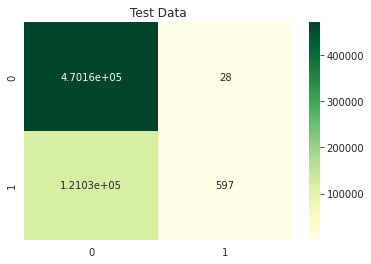

In [7]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(labels,y_pred)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');


In [8]:
features = pd.read_csv('/home/akash/Downloads/Machine/Machine Learning Final Project/Data/testing_data.csv',encoding= 'unicode_escape')
features_test=convert(features)
labels_test = np.array(features['isKilled'])
features_test= features_test.drop('isKilled', axis = 1)
features_test = np.array(features_test)

model_test = GaussianNB()

cv_scores = cross_val_score(model, features_test, labels_test, cv=5)
    
print(model_test, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')
y_pred = model.fit(features_test, labels_test).predict(features_test)
print("Number of mislabeled points out of a total %d points : %d" % (features_test.shape[0], (labels_test != y_pred).sum()))



GaussianNB()  mean accuracy:  63.161 % std:  0.003 %
Number of mislabeled points out of a total 148492 points : 54892


In [9]:
features = pd.read_csv('/home/akash/Downloads/Machine/Machine Learning Final Project/Data/testing_data.csv',encoding= 'unicode_escape')
features_test=convert(features)
labels_test = np.array(features['isKilled'])
features_test= features_test.drop('isKilled', axis = 1)
features_test = np.array(features_test)

model_test = GaussianNB(var_smoothing=0.0001873817422860383)

cv_scores = cross_val_score(model, features_test, labels_test, cv=5)
    
print(model_test, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')
y_pred = model.fit(features_test, labels_test).predict(features_test)
print("Number of mislabeled points out of a total %d points : %d" % (features_test.shape[0], (labels_test != y_pred).sum()))



GaussianNB(var_smoothing=0.0001873817422860383)  mean accuracy:  63.161 % std:  0.003 %
Number of mislabeled points out of a total 148492 points : 54892


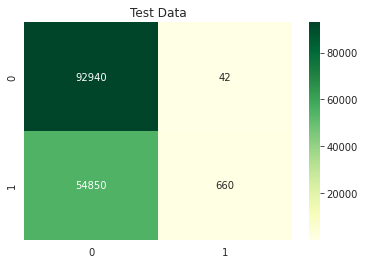

In [10]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(labels_test,y_pred)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');
